# Overview

In this notebook, we will go through the task generation pipeline in LIBERO. We will cover the following contents:

1. Retrieve a list of available objects, predicates
 in the codebase
2. Define your own initial state distribution
3. Define your own task goal
4. Generate the pddl file for the task

Now, let's get started!

## 1. Retrieve a list of objects available

In order for the sucess in task generation, we need to make sure that the objects and the predicates (object relations) specified are available in the codebase.

In [1]:
from libero.libero.envs.objects import get_object_dict, get_object_fn

# Get a dictionary of all the objects
object_dict = get_object_dict()
print(object_dict)

[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python /home/san/miniforge3/envs/openvla/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (macros.py:55)


{'alphabet_soup': <class 'libero.libero.envs.objects.hope_objects.AlphabetSoup'>, 'bbq_sauce': <class 'libero.libero.envs.objects.hope_objects.BbqSauce'>, 'butter': <class 'libero.libero.envs.objects.hope_objects.Butter'>, 'cherries': <class 'libero.libero.envs.objects.hope_objects.Cherries'>, 'chocolate_pudding': <class 'libero.libero.envs.objects.hope_objects.ChocolatePudding'>, 'cookies': <class 'libero.libero.envs.objects.hope_objects.Cookies'>, 'corn': <class 'libero.libero.envs.objects.hope_objects.Corn'>, 'cream_cheese': <class 'libero.libero.envs.objects.hope_objects.CreamCheese'>, 'ketchup': <class 'libero.libero.envs.objects.hope_objects.Ketchup'>, 'macaroni_and_cheese': <class 'libero.libero.envs.objects.hope_objects.MacaroniAndCheese'>, 'mayo': <class 'libero.libero.envs.objects.hope_objects.Mayo'>, 'milk': <class 'libero.libero.envs.objects.hope_objects.Milk'>, 'orange_juice': <class 'libero.libero.envs.objects.hope_objects.OrangeJuice'>, 'popcorn': <class 'libero.libero.e

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Now you can see all the available objects, you can retrieve the object class by specifying their categories (which are the keys in the dictionary)

In [2]:
category_name = "moka_pot"
object_cls = get_object_fn(category_name)
print(category_name, ": defined in the class ", object_cls)

moka_pot : defined in the class  <class 'libero.libero.envs.objects.turbosquid_objects.MokaPot'>


Similarly, you can retrieve the information about predicates.

In [3]:
from libero.libero.envs.predicates import get_predicate_fn_dict, get_predicate_fn

predicate_dict = get_predicate_fn_dict()
print(predicate_dict)
print("=============")
predicate_name = "on"
print(get_predicate_fn(predicate_name))


{'true': <libero.libero.envs.predicates.base_predicates.TruePredicateFn object at 0x7d1dcc5b1f30>, 'false': <libero.libero.envs.predicates.base_predicates.FalsePredicateFn object at 0x7d1dcc5b1f60>, 'in': <libero.libero.envs.predicates.base_predicates.In object at 0x7d1dcc5b1f90>, 'on': <libero.libero.envs.predicates.base_predicates.On object at 0x7d1dcc5b1fc0>, 'up': <libero.libero.envs.predicates.base_predicates.Up object at 0x7d1dcc5b22f0>, 'printjointstate': <libero.libero.envs.predicates.base_predicates.PrintJointState object at 0x7d1dcc5b23b0>, 'open': <libero.libero.envs.predicates.base_predicates.Open object at 0x7d1dcc5b2500>, 'close': <libero.libero.envs.predicates.base_predicates.Close object at 0x7d1dcc5b2a10>, 'turnon': <libero.libero.envs.predicates.base_predicates.TurnOn object at 0x7d1dcc5b2a40>, 'turnoff': <libero.libero.envs.predicates.base_predicates.TurnOff object at 0x7d1dcc5b2a70>}


## 2. Define your own initial state distribution

In [4]:
import numpy as np
from libero.libero.utils.bddl_generation_utils import get_xy_region_kwargs_list_from_regions_info
from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates
from libero.libero.utils.task_generation_utils import register_task_info, get_task_info, generate_bddl_from_task_info

@register_mu(scene_type="kitchen")
class KitchenScene1(InitialSceneTemplates):
    def __init__(self):

        fixture_num_info = {
            "kitchen_table": 1,
            "wooden_cabinet": 1,
        }

        object_num_info = {
            "akita_black_bowl": 1,
            "plate": 2,
            "moka_pot": 1,
            "milk": 2,
            "ketchup": 1,
            "macaroni_and_cheese": 1,
            "popcorn": 1,
            "alphabet_soup": 1,
            "salad_dressing": 1,
            "cream_cheese": 1,
            
        }

        super().__init__(
            workspace_name="kitchen_table",
            fixture_num_info=fixture_num_info,
            object_num_info=object_num_info
        )

    def define_regions(self):
        self.regions.update(
            self.get_region_dict(region_centroid_xy=[0.0, -0.30], 
                                 region_name="wooden_cabinet_init_region", 
                                 target_name=self.workspace_name, 
                                 region_half_len=0.01,
                                 yaw_rotation=(np.pi, np.pi))
        )

        self.regions.update(
            self.get_region_dict(region_centroid_xy=[0., 0.0], 
                                 region_name="akita_black_bowl_init_region", 
                                 target_name=self.workspace_name, 
                                 region_half_len=0.1)
        )

        self.regions.update(
            self.get_region_dict(region_centroid_xy=[0.0, 0.25], 
                                 region_name="plate_init_region", 
                                 target_name=self.workspace_name, 
                                 region_half_len=0.025)
        )

        self.regions.update(
            self.get_region_dict(region_centroid_xy=[0.0, 0.26], 
                                 region_name="moka_pot_init_region", 
                                 target_name=self.workspace_name, 
                                 region_half_len=0.1)
        )
        
        
        
        self.xy_region_kwargs_list = get_xy_region_kwargs_list_from_regions_info(self.regions)

    @property
    def init_states(self):
        states = [
            ("On", "plate_1", "kitchen_table_plate_init_region"),
            ("On", "plate_2", "kitchen_table_akita_black_bowl_init_region"),
            ("On", "akita_black_bowl_1", "kitchen_table_akita_black_bowl_init_region"),
            ("On", "wooden_cabinet_1", "kitchen_table_wooden_cabinet_init_region"),
            ("On", "moka_pot_1", "kitchen_table_moka_pot_init_region"),
            ("On", "milk_1", "kitchen_table_moka_pot_init_region"),
            ("On", "ketchup_1", "kitchen_table_moka_pot_init_region"),
            ("On", "macaroni_and_cheese_1", "kitchen_table_akita_black_bowl_init_region"),
            ("On", "milk_2", "kitchen_table_akita_black_bowl_init_region"),
            # ("On", "macaroni_and_cheese_1", "kitchen_table_macaroni_and_cheese_init_region"),
            # ("On", "popcorn_1", "kitchen_table_popcorn_init_region"),
            # ("On", "alphabet_soup_1", "kitchen_table_alphabet_soup_init_region"),
            # ("On", "salad_dressing_1", "kitchen_table_salad_dressing_init_region"),
            # ("On", "cream_cheese_1", "kitchen_table_cream_cheese_init_region"),
            ]
        return states

## 3. Define your own task goal

Now that you've defined the initial state distributions, you can specify a task goal based on the available objects and the potential goals it can acehive.

In [5]:
scene_name = "kitchen_scene1"
language = "Your Language 1"
register_task_info(language,
                    scene_name=scene_name,
                    objects_of_interest=["wooden_cabinet_1", "akita_black_bowl_1"],
                    goal_states=[("Open", "wooden_cabinet_1_top_region"), ("In", "akita_black_bowl_1", "wooden_cabinet_1_top_region")]
)

# Create another task with the same scene layout
scene_name = "kitchen_scene1"
language = "Your Language 2"
register_task_info(language,
                    scene_name=scene_name,
                    objects_of_interest=["wooden_cabinet_1", "akita_black_bowl_1"],
                    goal_states=[("Open", "wooden_cabinet_1_top_region"), ("In", "akita_black_bowl_1", "wooden_cabinet_1_bottom_region")]
)

The task goals will be temporarily saved in the variable `libero.libero.utils.task_generation_utils.TASK_INFO` in the format of namedtuple `libero.libero.utils.task_generation_utils.TaskInfoTuple`. This design aims to make it easy for batch creation of tasks.

In [6]:
# This is the default path to store all the pddl scene files. Here we store the files in the temporary folder. If you want to directly add files into the libero codebase, get the default path use the following commented lines:
# from libero.libero import get_libero_path
# YOUR_BDDL_FILE_PATH = get_libero_path("bddl_files")

YOUR_BDDL_FILE_PATH = "tmp/pddl_files"
bddl_file_names, failures = generate_bddl_from_task_info(folder=YOUR_BDDL_FILE_PATH)

print(bddl_file_names)

print("Encountered some failures: ", failures)


Succefully generated: 2
['tmp/pddl_files/KITCHEN_SCENE1_your_language_1.bddl', 'tmp/pddl_files/KITCHEN_SCENE1_your_language_2.bddl']
Encountered some failures:  []


Now you can see the content of the pddl file name. (Notice that we named our variable with bddl, since we are actually using the bddl package from Behavior. However, bddl is a subset of pddl, so we stick to the word PDDL for consistency in our paper writing and avoid confusion to the community.)

In [8]:
# with open(bddl_file_names[0], "r") as f:
#     content = f.read()
# print(content)

In [107]:
bddl_file_names[0]

'tmp/pddl_files/KITCHEN_SCENE1_your_language_1.bddl'

/home/san/miniforge3/envs/openvla/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


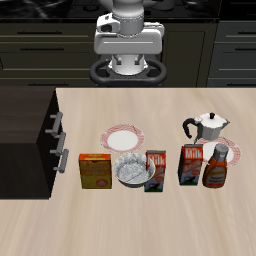

In [9]:
from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

import torch
import torchvision


env_args = {
    "bddl_file_name": 'tmp/pddl_files/KITCHEN_SCENE1_your_language_1.bddl',
    "camera_heights": 256,
    "camera_widths": 256
}

env = OffScreenRenderEnv(**env_args)
obs = env.reset()
display(Image.fromarray(obs["agentview_image"][::-1]))

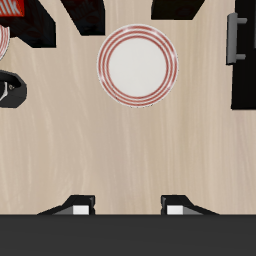

In [10]:
display(Image.fromarray(obs["robot0_eye_in_hand_image"][::-1]))

In [11]:
from experiments.robot.robot_utils import (
    DATE_TIME,
    get_action,
    get_image_resize_size,
    get_model,
    invert_gripper_action,
    normalize_gripper_action,
    set_seed_everywhere,
)

from run_libero_eval import GenerateConfig

cfg = GenerateConfig()
cfg.model_family = "openvla"
cfg.pretrained_checkpoint = "openvla/openvla-7b-finetuned-libero-spatial"
cfg.task_suite_name = "libero_spatial"
cfg.center_crop = True
cfg.unnorm_key = cfg.task_suite_name
model = get_model(cfg)

2025-09-12 21:17:28.304527: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-12 21:17:28.319954: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-12 21:17:28.319985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-12 21:17:28.320808: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-12 21:17:28.324657: I tensorflow/core/platform/cpu_feature_guar

[*] Instantiating Pretrained VLA model
[*] Loading in BF16 with Flash-Attention Enabled


<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
Loading checkpoint shards: 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]


You can ignore this if you are loading the base VLA (i.e. not fine-tuned) checkpoint.Otherwise, you may run into errors when trying to call `predict_action()` due to an absent `unnorm_key`.
Loaded model: <class 'transformers_modules.openvla.openvla-7b.31f090d05236101ebfc381b61c674dd4746d4ce0.modeling_prismatic.OpenVLAForActionPrediction'>


In [17]:
# Install minimal dependencies (`torch`, `transformers`, `timm`, `tokenizers`, ...)
# > pip install -r https://raw.githubusercontent.com/openvla/openvla/main/requirements-min.txt
from transformers import AutoModelForVision2Seq, AutoProcessor
import tensorflow as tf
from PIL import Image
from experiments.robot.openvla_utils import crop_and_resize
import torch

# # Load Processor & VLA
processor = AutoProcessor.from_pretrained("openvla/openvla-7b", trust_remote_code=True)
image = Image.fromarray(obs["full_image"])
image = image.convert("RGB")

if cfg.center_crop:
    batch_size = 1
    crop_scale = 0.9

    # Convert to TF Tensor and record original data type (should be tf.uint8)
    image = tf.convert_to_tensor(np.array(image))
    orig_dtype = image.dtype

    # Convert to data type tf.float32 and values between [0,1]
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Crop and then resize back to original size
    image = crop_and_resize(image, crop_scale, batch_size)

    # Convert back to original data type
    image = tf.clip_by_value(image, 0, 1)
    image = tf.image.convert_image_dtype(image, orig_dtype, saturate=True)

    # Convert back to PIL Image
    image = Image.fromarray(image.numpy())
    image = image.convert("RGB")

# Grab image input & format prompt
image = Image.fromarray(obs["robot0_eye_in_hand_image"][::-1])
prompt = "In: What action should the robot take to pick the milk behind the moka pot and place it in the bowl?\nOut:"

# Predict Action (7-DoF; un-normalize for BridgeData V2)
inputs = processor(prompt, image).to("cuda:0", dtype=torch.bfloat16)
action = model.predict_action(**inputs, unnorm_key=cfg.unnorm_key, do_sample=False)

# Execute...
# robot.act(action, ...)

<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


KeyError: 'full_image'

In [13]:
action

array([0.789, -0.387, -0.223, 0.047, 0.044, 0.000, 0.996])

In [ ]:
action = vla.predict_action(**inputs, unnorm_key="libero_spatial", do_sample=True)
action

In [9]:
len(action)

7